In [2]:
using LinearAlgebra
using Plots
using DataFrames
using CSV

In [3]:
used_ts = 1:5
colors = theme_palette(:auto)
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole-abstractions")

"/home/antonxue/stuff/nn-sdp/notebooks/../dump/cartpole-abstractions"

In [4]:
function loadDataFrame(qcas)
    qca_str = join(string.(qcas), "-")
    ostr = "deepsdp__dual"    
    filepath = joinpath(DUMP_DIR, "cart40_$(qca_str)_$(ostr).csv")
    return CSV.File(filepath)
end

b_df = loadDataFrame([:bounded])
s_df = loadDataFrame([:sector])
f_df = loadDataFrame([:final])
bs_df = loadDataFrame([:bounded, :sector])
bf_df = loadDataFrame([:bounded, :final])
sf_df = loadDataFrame([:sector, :final])
bsf_df = loadDataFrame([:bounded, :sector, :final])
;

In [5]:
sqrt.(b_df[:l2gain_squared])

5-element Vector{Float64}:
 2.6156113423313263
 2.4885456462956297
 2.552345995408777
 2.6663164631900464
 2.79549619577622

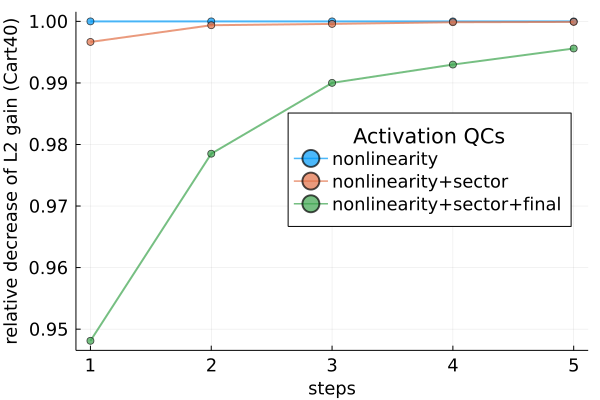

In [37]:
baseline = b_df[:l2gain_squared]

fs = 12
maker_size, alpha = 4, 0.7


plt = plot()

plt = plot!(plt, sqrt.(b_df[:l2gain_squared] ./ baseline), label="nonlinearity",
            marker=(:circle, marker_size), alpha=alpha, linewidth=2)
plt = plot!(plt, sqrt.(bs_df[:l2gain_squared] ./ baseline), label="nonlinearity+sector",
            marker=(:circle, marker_size),alpha=alpha, linewidth=2)
plt = plot!(plt, sqrt.(bsf_df[:l2gain_squared] ./ baseline), label="nonlinearity+sector+final",
            marker=(:circle, marker_size), alpha=alpha, linewidth=2)    

plt = plot!(plt, xlabel="steps", ylabel="relative decrease of L2 gain (Cart40)")
plt = plot!(plt, legend=:right, legendtitle="Activation QCs")

plt = plot!(plt, xlabelfontsize=fs, ylabelfontsize=fs)
plt = plot!(plt, xtickfontsize=fs, ytickfontsize=fs)
plt = plot!(plt, legendfontsize=fs, legendtitlefontsize=fs+2)

savefig(plt, joinpath(DUMP_DIR, "l2gain-qc-activs"))
    
plt